In [1]:
import pprint
import json
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
# from sklearn import datasets
# 
import os
from scipy.cluster import hierarchy
from matplotlib import cm
import umap

In [2]:
import math

def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [3]:
def rotate_frame(head,tail,left,right,body_angle):
    tail = rotate([0,0],tail,body_angle) 
    left = rotate([0,0],left,body_angle)
    right = rotate([0,0],right,body_angle)
    return head,tail,left,right
        

# Social

In [7]:
dir_name = 'results_social/'

with open(dir_name + 'feature_clips_dict.pckl','rb') as f:
    feature_clips_dict = pickle.load(f)

with open(dir_name + 'all_info_selected.pckl','rb') as f:
    all_info_selected = pickle.load(f)

In [125]:
def plot_clip_social_cluster(pose,cluster):

    colors_TO = cm.Greens(np.linspace(0,1,20))
    colors_TO = np.flip(colors_TO,axis = 0)

    colors = cm.Reds(np.linspace(0,1,20))
    colors = np.flip(colors,axis = 0)
    for i in range(15):
    
        # One mouse
        tail = [pose['body_length'][i],0]
        head = [0,0]
    
        left_ear = pose['left_ear'][i]
        left_ear_phi_sin = pose['left_ear_phi'][i]
        left_ear_phi_cos = pose['left_ear_phi'][i+15]
        left = [left_ear * left_ear_phi_cos,left_ear * left_ear_phi_sin]
        
        right_ear = pose['right_ear'][i] 
        right_ear_phi_sin = pose['right_ear_phi'][i]
        right_ear_phi_cos = pose['right_ear_phi'][i+15]
        right = [right_ear * right_ear_phi_cos,right_ear * right_ear_phi_sin]
        
        angle_mid = 0    
        if i > 7:
            for j in range(7,i):
                angle_mid += math.asin(pose['body_change_ang'][j])

        if i < 7: 
            for j in range(i,7):
                angle_mid -= math.asin(pose['body_change_ang'][j])
                
        head,tail,left,right = rotate_frame(head,tail,left,right,-angle_mid)
        
        displace = [pose['displace_x'][i], pose['displace_y'][i]]
        head = [head[i]+displace[i] for i in [0,1]]
        tail = [tail[i]+displace[i] for i in [0,1]]
        left = [left[i]+displace[i] for i in [0,1]]
        right = [right[i]+displace[i] for i in [0,1]]

        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = colors[i,:])#[1,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = colors[i,:])#[1,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = colors[i,:])#[1,1/15*i,1/15*i])
       
 
        # the other mouse
        tail = [pose['body_length_TO'][i],0]
        head = [0,0]
        left_ear = pose['left_ear_TO'][i]
        left_ear_phi_sin = pose['left_ear_phi_TO'][i]
        left_ear_phi_cos = pose['left_ear_phi_TO'][i+15]
        left = [left_ear * left_ear_phi_cos,left_ear * left_ear_phi_sin]
        
        right_ear = pose['right_ear_TO'][i] 
        right_ear_phi_sin = pose['right_ear_phi_TO'][i]
        right_ear_phi_cos = pose['right_ear_phi_TO'][i+15]
        right = [right_ear * right_ear_phi_cos,right_ear * right_ear_phi_sin]

        angle_mid = 0            
        if i > 7:
            for j in range(7,i):
                angle_mid += math.asin(pose['body_change_ang_TO'][j])

        if i < 7: 
            for j in range(i,7):
                angle_mid -= math.asin(pose['body_change_ang_TO'][j])

                
        head,tail,left,right = rotate_frame(head,tail,left,right,-angle_mid)

        # body
        two_body_ang_sin = pose['two_body_ang'][7]
        two_body_ang_cos = pose['two_body_ang'][22]
        two_body_ang = math.asin(two_body_ang_sin)
        if two_body_ang_cos <0:
            two_body_ang = math.pi - two_body_ang
        tail = rotate([0,0],tail,-two_body_ang) 
        left = rotate([0,0],left,-two_body_ang)
        right = rotate([0,0],right,-two_body_ang)
        
        
        #  nose
        nose_nose_displace_rho =  pose['nose_nose_displace_rho'][i]
        nose_nose_displace_phi_sin = pose['nose_nose_displace_phi'][i]
        nose_nose_displace_phi_cos = pose['nose_nose_displace_phi'][i+15]
        nose_old = [nose_nose_displace_rho * nose_nose_displace_phi_cos,nose_nose_displace_rho*nose_nose_displace_phi_sin]

        head = [head[i]+nose_old[i] for i in [0,1]]
        tail = [tail[i]+nose_old[i] for i in [0,1]]
        left = [left[i]+nose_old[i] for i in [0,1]]
        right = [right[i]+nose_old[i] for i in [0,1]]
        
        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = colors_TO[i,:])#[1,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = colors_TO[i,:])#[1,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = colors_TO[i,:])#[1,1/15*i,1/15*i])
        
        ax = plt.gca()
        ax.set_aspect('equal')
    ax = plt.gca()
    ax.set_xlim([-200,300])
    ax.set_ylim([-300,300])
        
    plt.title('cluster{}'.format(cluster))
    if os.path.isdir('cluster'):
        pass
    else:
        os.mkdir('cluster')
    plt.savefig(dir_name + '/cluster/cluster{}.svg'.format(cluster))
    plt.close()

In [126]:
with open(dir_name + 'all_result.pckl','rb') as f:
    all_result = pickle.load(f)
Z = all_result[0]['Z']    

with open(dir_name + 'feature_clips_dict.pckl','rb') as f:
    feature_clips_dict = pickle.load(f)
    
# Clusters
threshold = 500
clusters = hierarchy.fcluster(Z,threshold,'distance')
print(np.max(clusters))

for cluster in range(1,max(clusters)+1):
    
    indexes = [x for x in range(1,len(clusters)) if clusters[x] ==  cluster]
    
    body_length = []
    displace_y = []
    displace_x = []
    body_change_ang = []
    left_ear = []
    left_ear_phi = []
    right_ear = []
    right_ear_phi = []
    nose_nose_displace_rho = []
    nose_nose_displace_phi = []
    two_body_ang = []
    left_ear_TO = []
    left_ear_phi_TO = []
    right_ear_TO = []
    right_ear_phi_TO = []
    displace_x_TO = []
    displace_y_TO = []
    body_length_TO = []
    cluster_pose = {}
    body_change_ang_TO = []
    
    for i in indexes:
        
        if len(body_length) == 0:
            body_length = feature_clips_dict['body_length'][i]
        else:
            body_length += feature_clips_dict['body_length'][i]

        if len(displace_y) == 0:
            displace_y = feature_clips_dict['displace_y'][i]
        else:
            displace_y += feature_clips_dict['displace_y'][i]
  
        if len(displace_x) == 0:
            displace_x = feature_clips_dict['displace_x'][i]
        else:
            displace_x += feature_clips_dict['displace_x'][i]
            
        if len(body_change_ang) == 0:
            body_change_ang = feature_clips_dict['body_change_ang'][i]
        else:
            body_change_ang += feature_clips_dict['body_change_ang'][i]
            
        if len(left_ear) == 0:
            left_ear = feature_clips_dict['left_ear'][i]
        else:
            left_ear += feature_clips_dict['left_ear'][i] 
            
        if len(right_ear) == 0:
            right_ear = feature_clips_dict['right_ear'][i]
        else:
            right_ear += feature_clips_dict['right_ear'][i] 
            
        if len(left_ear_phi) == 0:
            left_ear_phi = feature_clips_dict['left_ear_phi'][i]
        else:
            left_ear_phi += feature_clips_dict['left_ear_phi'][i] 
            
        if len(right_ear_phi) == 0:
            right_ear_phi = feature_clips_dict['right_ear_phi'][i]
        else:
            right_ear_phi += feature_clips_dict['right_ear_phi'][i] 
            
        ## social
        
        if len(nose_nose_displace_rho) == 0:
            nose_nose_displace_rho = feature_clips_dict['nose_nose_displace_rho'][i]
        else:
            nose_nose_displace_rho += feature_clips_dict['nose_nose_displace_rho'][i]
            
        if len(nose_nose_displace_phi) == 0:
            nose_nose_displace_phi = feature_clips_dict['nose_nose_displace_phi'][i]
        else:
            nose_nose_displace_phi += feature_clips_dict['nose_nose_displace_phi'][i]
        
        if len(two_body_ang) == 0:
            two_body_ang = feature_clips_dict['two_body_ang'][i]
        else:
            two_body_ang += feature_clips_dict['two_body_ang'][i] 
            
        if len(body_change_ang_TO) == 0:
            body_change_ang_TO = feature_clips_dict['body_change_ang_TO'][i]
        else:
            body_change_ang_TO += feature_clips_dict['body_change_ang_TO'][i] 
            
        if len(body_length_TO) == 0:
            body_length_TO = feature_clips_dict['body_length_TO'][i]
        else:
            body_length_TO += feature_clips_dict['body_length_TO'][i] 
            
            
        if len(displace_y_TO) == 0:
            displace_y_TO = feature_clips_dict['displace_y_TO'][i]
        else:
            displace_y_TO += feature_clips_dict['displace_y_TO'][i]  
            
        if len(displace_x_TO) == 0:
            displace_x_TO = feature_clips_dict['displace_x_TO'][i]
        else:
            displace_x_TO += feature_clips_dict['displace_x_TO'][i] 
            
        if len(left_ear_TO) == 0:
            left_ear_TO = feature_clips_dict['left_ear_TO'][i]
        else:
            left_ear_TO += feature_clips_dict['left_ear_TO'][i] 
            
        if len(right_ear_TO) == 0:
            right_ear_TO = feature_clips_dict['right_ear_TO'][i]
        else:
            right_ear_TO += feature_clips_dict['right_ear_TO'][i] 
            
        if len(left_ear_phi_TO) == 0:
            left_ear_phi_TO = feature_clips_dict['left_ear_phi_TO'][i]
        else:
            left_ear_phi_TO += feature_clips_dict['left_ear_phi_TO'][i] 
            
        if len(right_ear_phi_TO) == 0:
            right_ear_phi_TO = feature_clips_dict['right_ear_phi_TO'][i]
        else:
            right_ear_phi_TO += feature_clips_dict['right_ear_phi_TO'][i] 
      
    cluster_pose['body_length'] = [x/len(indexes) for x in body_length]
    cluster_pose['displace_y'] = [x/len(indexes) for x in displace_y]
    cluster_pose['displace_x'] = [x/len(indexes) for x in displace_x]
    cluster_pose['body_change_ang'] = [x/len(indexes) for x in body_change_ang]

    cluster_pose['left_ear'] = [x/len(indexes) for x in left_ear]
    cluster_pose['left_ear_phi'] = [x/len(indexes) for x in left_ear_phi]
    cluster_pose['right_ear'] = [x/len(indexes) for x in right_ear]
    cluster_pose['right_ear_phi'] = [x/len(indexes) for x in right_ear_phi]
    
    ## social
    cluster_pose['body_length_TO'] = [x/len(indexes) for x in body_length_TO]
    cluster_pose['displace_y_TO'] = [x/len(indexes) for x in displace_y_TO]
    cluster_pose['displace_x_TO'] = [x/len(indexes) for x in displace_x_TO]
    cluster_pose['nose_nose_displace_rho'] = [x/len(indexes) for x in nose_nose_displace_rho]
    cluster_pose['nose_nose_displace_phi'] = [x/len(indexes) for x in nose_nose_displace_phi]
    cluster_pose['two_body_ang'] = [x/len(indexes) for x in two_body_ang]
    cluster_pose['body_change_ang_TO'] = [x/len(indexes) for x in body_change_ang_TO]
    cluster_pose['left_ear_TO'] = [x/len(indexes) for x in left_ear_TO]
    cluster_pose['left_ear_phi_TO'] = [x/len(indexes) for x in left_ear_phi_TO]
    cluster_pose['right_ear_TO'] = [x/len(indexes) for x in right_ear_TO]
    cluster_pose['right_ear_phi_TO'] = [x/len(indexes) for x in right_ear_phi_TO]
      
#     plt.figure()
    plot_clip_social_cluster(cluster_pose,cluster)
    

11


NameError: name 'dir_name' is not defined

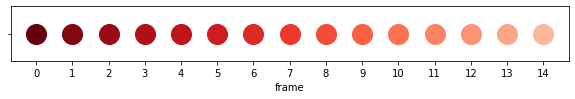

In [4]:
fig = plt.figure(figsize=(10,1))
colors = cm.Reds(np.linspace(0,1,20))
colors = np.flip(colors,axis = 0)

for i in range(15):
    plt.plot(i,1,c = colors[i,:],markersize = 20,marker='o')
plt.yticks([1],'')
plt.xticks(range(15))
plt.xlabel('frame')
# plt.show()
plt.savefig(dir_name + '/cluster/colormap.svg')
plt.close()

# Single

In [127]:
dir_name = 'results_single/'
# dir_name = 'results_new_feature_single/'

with open(dir_name + 'feature_clips_dict.pckl','rb') as f:
    feature_clips_dict = pickle.load(f)

with open(dir_name + 'all_info_selected.pckl','rb') as f:
    all_info_selected = pickle.load(f)


In [128]:
def plot_clip_single_cluster(pose,cluster):

    colors = cm.Reds(np.linspace(0,1,20))
    colors = np.flip(colors,axis = 0)
    for i in range(15):
    
        # One mouse
        tail = [pose['body_length'][i],0]
        head = [0,0]
    
        left_ear = pose['left_ear'][i]
        left_ear_phi_sin = pose['left_ear_phi'][i]
        left_ear_phi_cos = pose['left_ear_phi'][i+15]
        left = [left_ear * left_ear_phi_cos,left_ear * left_ear_phi_sin]
        
        right_ear = pose['right_ear'][i] 
        right_ear_phi_sin = pose['right_ear_phi'][i]
        right_ear_phi_cos = pose['right_ear_phi'][i+15]
        right = [right_ear * right_ear_phi_cos,right_ear * right_ear_phi_sin]
        
        angle_mid = 0    
        if i > 7:
            for j in range(7,i):
                angle_mid += math.asin(pose['body_change_ang'][j])

        if i < 7: 
            for j in range(i,7):
                angle_mid -= math.asin(pose['body_change_ang'][j])
                
        head,tail,left,right = rotate_frame(head,tail,left,right,-angle_mid)
        
        displace = [pose['displace_x'][i], pose['displace_y'][i]]
        head = [head[i]+displace[i] for i in [0,1]]
        tail = [tail[i]+displace[i] for i in [0,1]]
        left = [left[i]+displace[i] for i in [0,1]]
        right = [right[i]+displace[i] for i in [0,1]]

        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = colors[i,:])#[1,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = colors[i,:])#[1,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = colors[i,:])#[1,1/15*i,1/15*i])
       
        ax = plt.gca()
        ax.set_aspect('equal')
        
    plt.xlim([-100,300])
    plt.ylim([-100,100])
        
    plt.title('cluster{}'.format(cluster))
    if os.path.isdir('cluster'):
        pass
    else:
        os.mkdir('cluster')
    plt.savefig(dir_name + '/cluster/cluster{}.svg'.format(cluster))
    plt.close()

In [129]:
with open(dir_name + 'all_result.pckl','rb') as f:
    all_result = pickle.load(f)
Z = all_result[0]['Z']    

with open(dir_name + 'feature_clips_dict.pckl','rb') as f:
    feature_clips_dict = pickle.load(f)
# Clusters
threshold = 200
clusters = hierarchy.fcluster(Z,threshold,'distance')
print(np.max(clusters))

for cluster in range(1,max(clusters)+1):
    
    indexes = [x for x in range(1,len(clusters)) if clusters[x] ==  cluster]
    
    body_length = []
    displace_y = []
    displace_x = []
    body_change_ang = []
    left_ear = []
    left_ear_phi = []
    right_ear = []
    right_ear_phi = []
            plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1/15*i,1/15*i,1/15*i])
    for i in indexes:
        
        if len(body_length) == 0:
            body_length = feature_clips_dict['body_length'][i]
        else:
            body_length += feature_clips_dict['body_length'][i]

        if len(displace_y) == 0:
            displace_y = feature_clips_dict['displace_y'][i]
        else:
            displace_y += feature_clips_dict['displace_y'][i]
  
        if len(displace_x) == 0:
            displace_x = feature_clips_dict['displace_x'][i]
        else:
            displace_x += feature_clips_dict['displace_x'][i]
            
        if len(body_change_ang) == 0:
            body_change_ang = feature_clips_dict['body_change_ang'][i]
        else:
            body_change_ang += feature_clips_dict['body_change_ang'][i]
            
        if len(left_ear) == 0:
            left_ear = feature_clips_dict['left_ear'][i]
        else:
            left_ear += feature_clips_dict['left_ear'][i] 
            
        if len(right_ear) == 0:
            right_ear = feature_clips_dict['right_ear'][i]
        else:
            right_ear += feature_clips_dict['right_ear'][i] 
            
        if len(left_ear_phi) == 0:
            left_ear_phi = feature_clips_dict['left_ear_phi'][i]
        else:
            left_ear_phi += feature_clips_dict['left_ear_phi'][i] 
            
        if len(right_ear_phi) == 0:
            right_ear_phi = feature_clips_dict['right_ear_phi'][i]
        else:
            right_ear_phi += feature_clips_dict['right_ear_phi'][i] 
            

      
    cluster_pose['body_length'] = [x/len(indexes) for x in body_length]
    cluster_pose['displace_y'] = [x/len(indexes) for x in displace_y]
    cluster_pose['displace_x'] = [x/len(indexes) for x in displace_x]
    cluster_pose['body_change_ang'] = [x/len(indexes) for x in body_change_ang]

    cluster_pose['left_ear'] = [x/len(indexes) for x in left_ear]
    cluster_pose['left_ear_phi'] = [x/len(indexes) for x in left_ear_phi]
    cluster_pose['right_ear'] = [x/len(indexes) for x in right_ear]
    cluster_pose['right_ear_phi'] = [x/len(indexes) for x in right_ear_phi]

    plot_clip_single_cluster(cluster_pose,cluster)

8


In [8]:
fig = plt.figure(figsize=(10,1))
colors = cm.Reds(np.linspace(0,1,20))
colors = np.flip(colors,axis = 0)
colors_TO = cm.Greens(np.linspace(0,1,20))
colors_TO = np.flip(colors_TO,axis = 0)
for i in range(15):
    plt.plot(i,1,c = colors[i,:],markersize = 20,marker='o')
    plt.plot(i,4,c = colors_TO[i,:],markersize = 20,marker='o')
plt.yticks([1,4],['reference mouse','the other mouse'])
plt.xticks(range(15))
plt.xlabel('frame')
plt.ylim([-1,6])
# plt.tight_layout()
plt.savefig(dir_name + '/cluster/colormap.svg')
plt.close()

## Stop

In [12]:
plot_clip_social(feature_clips_dict,1)

NameError: name 'plot_clip_social' is not defined

In [199]:
def plot_clip_social(pose,clip):


    for i in range(15):
    
        # One mouse
        tail = [pose['body_length'][clip][i],0]
        head = [0,0]
    
        left_ear = pose['left_ear'][clip][i]
        left_ear_phi_sin = pose['left_ear_phi'][clip][i]
        left_ear_phi_cos = pose['left_ear_phi'][clip][i+15]
        left = [left_ear * left_ear_phi_cos,left_ear * left_ear_phi_sin]
        
        right_ear = pose['right_ear'][clip][i] 
        right_ear_phi_sin = pose['right_ear_phi'][clip][i]
        right_ear_phi_cos = pose['right_ear_phi'][clip][i+15]
        right = [right_ear * right_ear_phi_cos,right_ear * right_ear_phi_sin]
        
        angle_mid = 0    
        if i > 7:
            for j in range(7,i):
                angle_mid += math.asin(pose['body_change_ang'][clip][j])

        if i < 7: 
            for j in range(i,7):
                angle_mid -= math.asin(pose['body_change_ang'][clip][j])
                
        head,tail,left,right = rotate_frame(head,tail,left,right,-angle_mid)
        
        displace = [pose['displace_x'][clip][i], pose['displace_y'][clip][i]]
        head = [head[i]+displace[i] for i in [0,1]]
        tail = [tail[i]+displace[i] for i in [0,1]]
        left = [left[i]+displace[i] for i in [0,1]]
        right = [right[i]+displace[i] for i in [0,1]]

        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1/15*i,1/15*i,1/15*i])
       
 
        # the other mouse
        tail = [pose['body_length_TO'][clip][i],0]
        head = [0,0]
        left_ear = pose['left_ear_TO'][clip][i]
        left_ear_phi_sin = pose['left_ear_phi_TO'][clip][i]
        left_ear_phi_cos = pose['left_ear_phi_TO'][clip][i+15]
        left = [left_ear * left_ear_phi_cos,left_ear * left_ear_phi_sin]
        
        right_ear = pose['right_ear_TO'][clip][i] 
        right_ear_phi_sin = pose['right_ear_phi_TO'][clip][i]
        right_ear_phi_cos = pose['right_ear_phi_TO'][clip][i+15]
        right = [right_ear * right_ear_phi_cos,right_ear * right_ear_phi_sin]

        angle_mid = 0            
        if i > 7:
            for j in range(7,i):
                angle_mid += math.asin(pose['body_change_ang_TO'][clip][j])

        if i < 7: 
            for j in range(i,7):
                angle_mid -= math.asin(pose['body_change_ang_TO'][clip][j])

                
        head,tail,left,right = rotate_frame(head,tail,left,right,-angle_mid)

        # body
        two_body_ang_sin = pose['two_body_ang'][clip][7]
        two_body_ang_cos = pose['two_body_ang'][clip][22]
        two_body_ang = math.asin(two_body_ang_sin)
        if two_body_ang_cos <0:
            two_body_ang = math.pi - two_body_ang
        tail = rotate([0,0],tail,-two_body_ang) 
        left = rotate([0,0],left,-two_body_ang)
        right = rotate([0,0],right,-two_body_ang)
        
        
        #  nose
        nose_nose_displace_rho =  pose['nose_nose_displace_rho'][clip][i]
        nose_nose_displace_phi_sin = pose['nose_nose_displace_phi'][clip][i]
        nose_nose_displace_phi_cos = pose['nose_nose_displace_phi'][clip][i+15]
        nose_old = [nose_nose_displace_rho * nose_nose_displace_phi_cos,nose_nose_displace_rho*nose_nose_displace_phi_sin]

        head = [head[i]+nose_old[i] for i in [0,1]]
        tail = [tail[i]+nose_old[i] for i in [0,1]]
        left = [left[i]+nose_old[i] for i in [0,1]]
        right = [right[i]+nose_old[i] for i in [0,1]]
        
        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1,1/15*i,1/15*i])
        
        ax = plt.gca()
        ax.set_aspect('equal')
       

In [191]:
def plot_raw_pose_single(pose):
        
    for i in range(15):
        head = pose[i][0]
        left = pose[i][1]
        right = pose[i][2]
        tail = pose[i][3]
        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1/15*i,1/15*i,1/15*i])
        ax = plt.gca()
        ax.set_aspect('equal')

[ 51.2305744  -30.47310327] [ 14.0725868  -40.12713924]
[ 50.04242962 -31.90647554] [ 13.89541579 -43.15837837]
[ 60.95819749 -23.71945088] [ 14.52262014 -47.3582927 ]
[ 36.46629878 -32.28832833] [ 13.62825413 -54.47297761]
[ 44.31002469 -32.11869693] [ 12.90974331 -57.80258175]
[ 30.13334772 -26.43596127] [ 11.95810858 -58.36381004]
[ 37.2568949  -33.62607362] [ 12.23237712 -58.3706608 ]
[ 35.01516374 -35.11908799] [ 14.01895334 -57.99906034]
[ 31.56127623 -26.5043959 ] [ 13.77269146 -57.44859115]
[ 38.14664123 -34.11658402] [ 13.8575779 -57.4077683]
[ 37.09770205 -31.43020232] [ 13.74009637 -57.60396125]
[ 38.18085826 -32.6888321 ] [ 15.21008536 -59.10307984]
[ 36.1231211  -32.57560056] [ 16.70435684 -59.72378434]
[ 35.15726608 -31.86887589] [ 18.55851108 -61.34694134]
[ 31.20893454 -31.6969282 ] [ 21.44722329 -63.6844098 ]


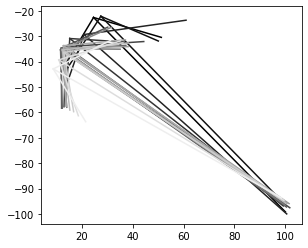

In [196]:
with open(dir_name + 'clips_dict.pckl','rb') as f:
    clips_dict = pickle.load(f)
    
pose = clips_dict['poseTheOther_clips_alignToOther'][1]
plot_raw_pose_single(pose)

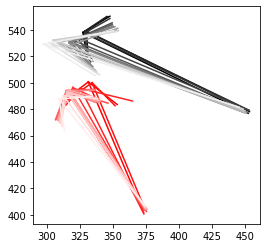

In [192]:
def plot_raw_pose(pose,pose_TO):
        
    for i in range(15):
        head = pose[i][0]
        left = pose[i][1]
        right = pose[i][2]
        tail = pose[i][3]
        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1/15*i,1/15*i,1/15*i])
        
        head = pose_TO[i][0]
        left = pose_TO[i][1]
        right = pose_TO[i][2]
        tail = pose_TO[i][3]
        
        
        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1,1/15*i,1/15*i])
        
        ax = plt.gca()
        ax.set_aspect('equal')
plot_raw_pose(pose_clips[1],poseTheOther_clips[1])

In [98]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)


In [96]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    div = np.linalg.norm(vector)
    if div == 0 :
        # print(vector)
        return vector
    else:
        return vector / div

In [94]:
def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    # print(v1_u)
    v2_u = unit_vector(v2)
    # print(v1_u)
    angle = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    # print('angle',angle)
    _,phi1 = cart2pol(v1[0],v1[1])
    phi1 = math.degrees(phi1)

    _,phi2 = cart2pol(v2[0],v2[1])
    phi2 = math.degrees(phi2)


    if (phi1<phi2):
        if (phi2-phi1)<180:
            flag = True
        else:
            flag = False
    else:
        if (phi1-phi2)<180:
            flag = False
        else:
            flag = True
    if flag:
        angle = - angle

    return angle, np.cos(angle),np.sin(angle)

In [65]:
def plot_clip(feature_clips_dict,clip):

    for i in range(15):
    
        tail = [-pose['body_length'][clip][i],0]
        head = [0,0]
    
        head_length = pose['head_length'][clip][i]
        head_body_angles = pose['head_body_angles'][clip][i]
        left = rotate([0,0],[-head_length/math.cos(math.radians(40)),0],head_body_angles-math.radians(40))
        right = rotate([0,0],[-head_length/math.cos(math.radians(40)),0],head_body_angles+math.radians(40))
        angle_mid = 0
        
            
        if i > 7:
            for j in range(7,i):
                angle_mid += math.asin(pose['sin_angles_bodyChange'][clip][j])

        if i < 7: 
            for j in range(i+1,7+1):
                angle_mid -= math.asin(pose['sin_angles_bodyChange'][clip][j])

                
        head,tail,left,right = rotate_frame(head,tail,left,right,angle_mid)
        
        displace = [pose['displace_x'][clip][i], pose['displace_y'][clip][i]]
        head = [head[i]+displace[i] for i in [0,1]]
        tail = [tail[i]+displace[i] for i in [0,1]]
        left = [left[i]+displace[i] for i in [0,1]]
        right = [right[i]+displace[i] for i in [0,1]]
    
        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1/15*i,1/15*i,1/15*i])


In [14]:
def plot_clip(pose):

    for i in range(15):
    
        tail = [-pose['body_length'][i],0]
        head = [0,0]
    
        head_length = pose['head_length'][i]
        head_body_angles = pose['head_body_angles'][i]
        left = rotate([0,0],[-head_length/math.cos(math.radians(40)),0],head_body_angles-math.radians(40))
        right = rotate([0,0],[-head_length/math.cos(math.radians(40)),0],head_body_angles+math.radians(40))
        angle_mid = 0
        
            
        if i > 7:
            for j in range(7,i):
                angle_mid += math.asin(pose['sin_angles_bodyChange'][j])

        if i < 7: 
            for j in range(i+1,7+1):
                angle_mid -= math.asin(pose['sin_angles_bodyChange'][j])

                
        head,tail,left,right = rotate_frame(head,tail,left,right,angle_mid)
        
        displace = [pose['displace_x'][i], pose['displace_y'][i]]
        head = [head[i]+displace[i] for i in [0,1]]
        tail = [tail[i]+displace[i] for i in [0,1]]
        left = [left[i]+displace[i] for i in [0,1]]
        right = [right[i]+displace[i] for i in [0,1]]
    
        plt.plot([head[0], tail[0]],[head[1],tail[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], left[0]],[head[1],left[1]],c = [1/15*i,1/15*i,1/15*i])
        plt.plot([head[0], right[0]],[head[1],right[1]],c = [1/15*i,1/15*i,1/15*i])
       

## Colorbar

# Social behavior visualization

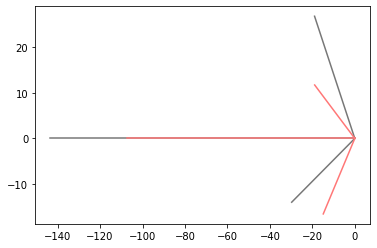

In [18]:
pose = raw_feature_clips_dict[1]
plot_clip_social(pose)


## Skeleton for each cluster

In [25]:
with open(dir_name + 'all_result.pckl','rb') as f:
    all_result = pickle.load(f)
Z = all_result[0]['Z']    
    
with open(dir_name + 'raw_feature_clips_dict.pckl','rb') as f:
    raw_feature_clips_dict = pickle.load(f)
# print(len(raw_feature_clips_dict))

# Clusters
threshold = 400
clusters = hierarchy.fcluster(Z,threshold,'distance')
print(np.max(clusters))

for cluster in range(1,max(clusters)+1):
    
    indexes = [x for x in range(len(clusters)) if clusters[x] ==  cluster]
    
    body_length = []
    displace_y = []
    displace_x = []
    cos_angles_twoBody = []
    head_body_angles = []
    head_length = []
    cluster_pose = {}

    for i in indexes:
        
        pose = raw_feature_clips_dict[i] 
        
        if len(body_length) == 0:
            body_length = pose['body_length']
        else:
            body_length += pose['body_length']

        if len(displace_y) == 0:
            displace_y = pose['displace_y']
        else:
            displace_y += pose['displace_y']
  
        if len(displace_x) == 0:
            displace_x = pose['displace_x']
        else:
            displace_x += pose['displace_x']
            
        if len(cos_angles_twoBody) == 0:
            cos_angles_twoBody = pose['sin_angles_bodyChange']
        else:
            cos_angles_twoBody += pose['sin_angles_bodyChange']
            
        if len(head_body_angles) == 0:
            head_body_angles = pose['head_body_angles']
        else:
            head_body_angles += pose['head_body_angles']
            
        if len(head_length) == 0:
            head_length = pose['head_length']
        else:
            head_length += pose['head_length']  
      
    cluster_pose['body_length'] = [x/len(indexes) for x in body_length]
    cluster_pose['displace_y'] = [x/len(indexes) for x in displace_y]
    cluster_pose['displace_x'] = [x/len(indexes) for x in displace_x]
    cluster_pose['sin_angles_bodyChange'] = [x/len(indexes) for x in cos_angles_twoBody]
    cluster_pose['head_body_angles'] = [x/len(indexes) for x in head_body_angles]
    cluster_pose['head_length'] = [x/len(indexes) for x in head_length]
        
    plt.figure()
    plot_clip(cluster_pose)
    plt.title('cluster{}'.format(cluster))
    plt.savefig(dir_name + 'cluster{}.svg'.format(cluster))

1


NameError: name 'plot_clip' is not defined

<Figure size 432x288 with 0 Axes>